In [1]:
import numpy as np
import pandas as pd

In [2]:
#데이터 가져오기
d = open('output.txt','r')
data = d.read().splitlines()

In [3]:
#데이터를 구분할 기준으로 파일명을 설정
title = [s for s in data if 'File: ' in s]
title[:5]

['File: ./tp_il1_128_32_1_r_il2_512_8_4_r.txt',
 'File: ./tp_il1_16_32_8_r_il2_8_1024_4_f.txt',
 'File: ./tp_il1_64_32_2_l_il2_512_16_4_l.txt',
 'File: ./tp_il1_32_128_1_f_il2_2_4096_2_r.txt',
 'File: ./tp_il1_4_128_8_f_il2_32_512_2_l.txt']

In [4]:
title_index = [i for i in range(len(data)) if 'File: ' in data[i]]
title_index[:5]

[0, 84, 168, 252, 336]

In [5]:
## 에러뜬 파일 제거
data_refine = []
for i in range(len(title_index)-1):
    gap = title_index[i] - title_index[i+1]
    if gap == -84:
        j = title_index[i]
        data_refine.append(j)

In [33]:
data_refine.append(title_index[-1])

In [34]:
len(data_refine)

35280

In [7]:
data[84:100]

['File: ./tp_il1_16_32_8_r_il2_8_1024_4_f.txt',
 '',
 'sim: ** simulation statistics **',
 'sim_num_insn                1000000 # total number of instructions executed',
 'sim_num_refs                 399229 # total number of loads and stores executed',
 'sim_elapsed_time                  1 # total simulation time in seconds',
 'sim_inst_rate          1000000.0000 # simulation speed (in insts/sec)',
 'il1.accesses                1000000 # total number of accesses',
 'il1.hits                     976035 # total number of hits',
 'il1.misses                    23965 # total number of misses',
 'il1.replacements              23837 # total number of replacements',
 'il1.writebacks                    0 # total number of writebacks',
 'il1.invalidations                 0 # total number of invalidations',
 'il1.miss_rate                0.0240 # miss rate (i.e., misses/ref)',
 'il1.repl_rate                0.0238 # replacement rate (i.e., repls/ref)',
 'il1.wb_rate                  0.0000 # wr

In [8]:
#구분자로 제목 분할 & 데이터 처리
sim_title = []
sim_data = []
for i in data_refine:
    sim_title.append(data[i][11:(len(data[i])-4)].split('_'))
    sim_data.append(data[i+3:i+81])

In [9]:
cache_title_df = pd.DataFrame(columns = ['il1','il1_nsets','il1_bsize','il1_assoc','il1_repl','il2','il2_nsets','il2_bsize','il2_assoc','il2_repl'],data = sim_title)
cache_title_df.head()

,il1,il1_nsets,il1_bsize,il1_assoc,il1_repl,il2,il2_nsets,il2_bsize,il2_assoc,il2_repl
0,il1,128,32,1,r,il2,512,8,4,r
1,il1,16,32,8,r,il2,8,1024,4,f
2,il1,64,32,2,l,il2,512,16,4,l
3,il1,32,128,1,f,il2,2,4096,2,r
4,il1,4,128,8,f,il2,32,512,2,l


In [10]:
cache_simul_df = pd.DataFrame(columns = ['sim_num_insn', 'sim_num_refs', 'sim_elapsed_time', 'sim_inst_rate', 'il1.accesses', 'il1.hits', 'il1.misses', 'il1.replacements', 'il1.writebacks',
 'il1.invalidations', 'il1.miss_rate', 'il1.repl_rate', 'il1.wb_rate', 'il1.inv_rate', 'il2.accesses', 'il2.hits', 'il2.misses', 'il2.replacements',
 'il2.writebacks', 'il2.invalidations', 'il2.miss_rate', 'il2.repl_rate', 'il2.wb_rate', 'il2.inv_rate', 'dl1.accesses', 'dl1.hits', 'dl1.misses',
 'dl1.replacements', 'dl1.writebacks', 'dl1.invalidations', 'dl1.miss_rate', 'dl1.repl_rate', 'dl1.wb_rate', 'dl1.inv_rate ', 'ul2.accesses', 'ul2.hits',
 'ul2.misses', 'ul2.replacements', 'ul2.writebacks', 'ul2.invalidations', 'ul2.miss_rate', 'ul2.repl_rate', 'ul2.wb_rate', 'ul2.inv_rate', 'itlb.accesses',
 'itlb.hits', 'itlb.misses', 'itlb.replacements', 'itlb.writebacks', 'itlb.invalidations', 'itlb.miss_rate', 'itlb.repl_rate', 'itlb.wb_rate', 'itlb.inv_rate',
 'dtlb.accesses', 'dtlb.hits', 'dtlb.misses', 'dtlb.replacements', 'dtlb.writebacks', 'dtlb.invalidations', 'dtlb.miss_rate', 'dtlb.repl_rate', 'dtlb.wb_rate',
 'dtlb.inv_rate', 'ld_text_base', 'ld_text_size', 'ld_data_base', "ld_data_size", 'ld_stack_base', 'ld_stack_size', 'ld_prog_entry', 'ld_environ_base',
 'ld_target_big_endian', 'mem.page_count', 'mem.page_mem', 'mem.ptab_misses', 'mem.ptab_accesses', 'mem.ptab_miss_rate'], data = sim_data)
cache_simul_df.head()

,sim_num_insn,sim_num_refs,sim_elapsed_time,sim_inst_rate,il1.accesses,il1.hits,il1.misses,il1.replacements,il1.writebacks,il1.invalidations,...,ld_stack_base,ld_stack_size,ld_prog_entry,ld_environ_base,ld_target_big_endian,mem.page_count,mem.page_mem,mem.ptab_misses,mem.ptab_accesses,mem.ptab_miss_rate
0,sim_num_insn 0 # total nu...,sim_num_refs 0 # total nu...,sim_elapsed_time 1 # total si...,sim_inst_rate 0.0000 # simulati...,il1.accesses 1 # total nu...,il1.hits 0 # total nu...,il1.misses 1 # total nu...,il1.replacements 0 # total nu...,il1.writebacks 0 # total nu...,il1.invalidations 0 # total nu...,...,ld_stack_base 0x011ff9b000 # program ...,ld_stack_size 16384 # program ...,ld_prog_entry 0x012002e530 # program ...,ld_environ_base 0x011ff97000 # program ...,ld_target_big_endian 0 # target e...,mem.page_count 267 # total nu...,mem.page_mem 2136k # total si...,mem.ptab_misses 268 # total fi...,mem.ptab_accesses 4347284 # total pa...,mem.ptab_miss_rate 0.0001 # first le...
1,sim_num_insn 1000000 # total nu...,sim_num_refs 399229 # total nu...,sim_elapsed_time 1 # total si...,sim_inst_rate 1000000.0000 # simulati...,il1.accesses 1000000 # total nu...,il1.hits 976035 # total nu...,il1.misses 23965 # total nu...,il1.replacements 23837 # total nu...,il1.writebacks 0 # total nu...,il1.invalidations 0 # total nu...,...,ld_stack_base 0x011ff9b000 # program ...,ld_stack_size 16384 # program ...,ld_prog_entry 0x012002e530 # program ...,ld_environ_base 0x011ff97000 # program ...,ld_target_big_endian 0 # target e...,mem.page_count 301 # total nu...,mem.page_mem 2408k # total si...,mem.ptab_misses 2431 # total fi...,mem.ptab_accesses 7155354 # total pa...,mem.ptab_miss_rate 0.0003 # first le...
2,sim_num_insn 0 # total nu...,sim_num_refs 0 # total nu...,sim_elapsed_time 1 # total si...,sim_inst_rate 0.0000 # simulati...,il1.accesses 1 # total nu...,il1.hits 0 # total nu...,il1.misses 1 # total nu...,il1.replacements 0 # total nu...,il1.writebacks 0 # total nu...,il1.invalidations 0 # total nu...,...,ld_stack_base 0x011ff9b000 # program ...,ld_stack_size 16384 # program ...,ld_prog_entry 0x012002e530 # program ...,ld_environ_base 0x011ff97000 # program ...,ld_target_big_endian 0 # target e...,mem.page_count 267 # total nu...,mem.page_mem 2136k # total si...,mem.ptab_misses 268 # total fi...,mem.ptab_accesses 4347284 # total pa...,mem.ptab_miss_rate 0.0001 # first le...
3,sim_num_insn 1000000 # total nu...,sim_num_refs 399229 # total nu...,sim_elapsed_time 1 # total si...,sim_inst_rate 1000000.0000 # simulati...,il1.accesses 1000000 # total nu...,il1.hits 969317 # total nu...,il1.misses 30683 # total nu...,il1.replacements 30651 # total nu...,il1.writebacks 0 # total nu...,il1.invalidations 0 # total nu...,...,ld_stack_base 0x011ff9b000 # program ...,ld_stack_size 16384 # program ...,ld_prog_entry 0x012002e530 # program ...,ld_environ_base 0x011ff97000 # program ...,ld_target_big_endian 0 # target e...,mem.page_count 301 # total nu...,mem.page_mem 2408k # total si...,mem.ptab_misses 2431 # total fi...,mem.ptab_accesses 7155354 # total pa...,mem.ptab_miss_rate 0.0003 # first le...
4,sim_num_insn 1000000 # total nu...,sim_num_refs 399229 # total nu...,sim_elapsed_time 1 # total si...,sim_inst_rate 1000000.0000 # simulati...,il1.accesses 1000000 # total nu...,il1.hits 984767 # total nu...,il1.misses 15233 # total nu...,il1.replacements 15201 # total nu...,il1.writebacks 0 # total nu...,il1.invalidations 0 # total nu...,...,ld_stack_base 0x011ff9b000 # program ...,ld_stack_size 16384 # program ...,ld_prog_entry 0x012002e530 # program ...,ld_environ_base 0x011ff97000 # program ...,ld_target_big_endian 0 # target e...,mem.page_count 301 # total nu...,mem.page_mem 2408k # total si...,mem.ptab_misses 2431 # total fi...,mem.ptab_accesses 7155354 # total pa...,mem.ptab_miss_rate 0.0003 # first le...


In [11]:
## cache_simul의 데이터만 가져오기
Data = []
for i in range(len(cache_simul_df)):
    row = []
    for j in cache_simul_df.columns.tolist():
        row.append(cache_simul_df.iloc[i].loc[j][len(j):cache_simul_df.iloc[i].loc[j].find("#")-1])
    Data.append(row)

cache_simul_df = pd.DataFrame(columns = cache_simul_df.columns.tolist(), data = Data)

In [12]:
simul_result = pd.concat([cache_title_df,cache_simul_df],axis = 1)
simul_result.head()

,il1,il1_nsets,il1_bsize,il1_assoc,il1_repl,il2,il2_nsets,il2_bsize,il2_assoc,il2_repl,...,ld_stack_base,ld_stack_size,ld_prog_entry,ld_environ_base,ld_target_big_endian,mem.page_count,mem.page_mem,mem.ptab_misses,mem.ptab_accesses,mem.ptab_miss_rate
0,il1,128,32,1,r,il2,512,8,4,r,...,0x011ff9b000,16384,0x012002e530,0x011ff97000,0,267,2136k,268,4347284,0.0001
1,il1,16,32,8,r,il2,8,1024,4,f,...,0x011ff9b000,16384,0x012002e530,0x011ff97000,0,301,2408k,2431,7155354,0.0003
2,il1,64,32,2,l,il2,512,16,4,l,...,0x011ff9b000,16384,0x012002e530,0x011ff97000,0,267,2136k,268,4347284,0.0001
3,il1,32,128,1,f,il2,2,4096,2,r,...,0x011ff9b000,16384,0x012002e530,0x011ff97000,0,301,2408k,2431,7155354,0.0003
4,il1,4,128,8,f,il2,32,512,2,l,...,0x011ff9b000,16384,0x012002e530,0x011ff97000,0,301,2408k,2431,7155354,0.0003


In [35]:
refine = []
for i in range(len(simul_result)):
    if int(simul_result['sim_num_insn'][i])!=0 :
        refine.append(i)

cs_df = simul_result.iloc[refine]

In [14]:
cs_df.to_csv('cs_df_data.csv',index = False)

In [15]:
gc_cs_df = pd.read_csv('cs_df_data.csv')

In [16]:
il1r_df = gc_cs_df[gc_cs_df.iloc[:,4] == 'r']

In [17]:
il12_rr_df = il1r_df[il1r_df.iloc[:,9] == 'r']

In [18]:
target_data = il12_rr_df.iloc[:,[1,2,3,6,7,8,16]]

In [19]:
target_data.head()

,il1_nsets,il1_bsize,il1_assoc,il2_nsets,il2_bsize,il2_assoc,il1.misses
4,512,8,1,1024,16,1,134103
12,4,256,4,2,512,16,21211
18,4,512,2,16,512,2,27708
32,2,512,4,4,4096,2,24525
42,64,64,1,128,256,1,39977


In [20]:
target_data2 = il12_rr_df.iloc[:,[1,2,3,6,7,8,16,26]]

In [21]:
target_data2

,il1_nsets,il1_bsize,il1_assoc,il2_nsets,il2_bsize,il2_assoc,il1.misses,il2.misses
4,512,8,1,1024,16,1,134103,32547
12,4,256,4,2,512,16,21211,2392
18,4,512,2,16,512,2,27708,4303
32,2,512,4,4,4096,2,24525,6814
42,64,64,1,128,256,1,39977,6589
...,...,...,...,...,...,...,...,...
23901,8,64,8,2,2048,2,17761,5416
23912,64,8,8,128,64,2,51494,5393
23925,128,8,4,2048,16,1,60685,11498
23928,512,8,1,32,16,16,134103,12264


In [22]:
target_data3 = il12_rr_df.iloc[:,[1,2,3,6,7,8,16,20,26,30]]

In [23]:
target_data3.head()

,il1_nsets,il1_bsize,il1_assoc,il2_nsets,il2_bsize,il2_assoc,il1.misses,il1.miss_rate,il2.misses,il2.miss_rate
4,512,8,1,1024,16,1,134103,0.1341,32547,0.2427
12,4,256,4,2,512,16,21211,0.0212,2392,0.1128
18,4,512,2,16,512,2,27708,0.0277,4303,0.1553
32,2,512,4,4,4096,2,24525,0.0245,6814,0.2778
42,64,64,1,128,256,1,39977,0.0400,6589,0.1648


In [24]:
il1_size = np.array(target_data.iloc[:,0])*np.array(target_data.iloc[:,1])*np.array(target_data.iloc[:,2]) 
il2_size = np.array(target_data.iloc[:,3])*np.array(target_data.iloc[:,4])*np.array(target_data.iloc[:,5])

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

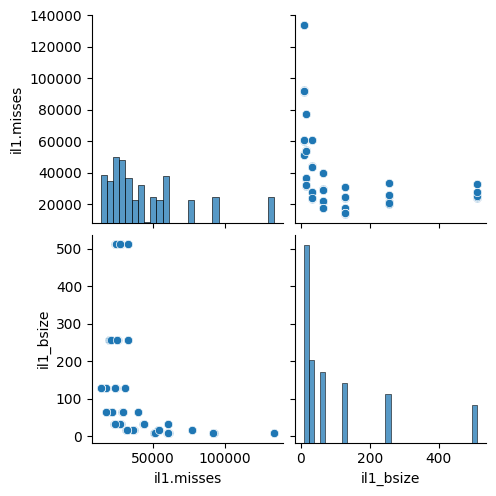

In [26]:
sns.pairplot(target_data3, vars = ['il1.misses','il1_bsize'])

In [27]:
target_data3.head()

,il1_nsets,il1_bsize,il1_assoc,il2_nsets,il2_bsize,il2_assoc,il1.misses,il1.miss_rate,il2.misses,il2.miss_rate
4,512,8,1,1024,16,1,134103,0.1341,32547,0.2427
12,4,256,4,2,512,16,21211,0.0212,2392,0.1128
18,4,512,2,16,512,2,27708,0.0277,4303,0.1553
32,2,512,4,4,4096,2,24525,0.0245,6814,0.2778
42,64,64,1,128,256,1,39977,0.0400,6589,0.1648


In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [29]:
x_data = data_df.iloc[:,range(6)].values

NameError: name 'data_df' is not defined

In [ ]:
y1_data = data_df['il1_misses']
y2_data = data_df['il2_misses']

In [ ]:
x_data1 = sm.add_constant(x_data, has_constant = 'add')

In [ ]:
data_df.iloc[:,range(6)].columns

In [ ]:
multi_model = sm.OLS(y1_data, x_data1)

fitted_multi_model = multi_model.fit()

fitted_multi_model.summary()

In [ ]:
multi_model = sm.OLS(y2_data, x_data1)

fitted_multi_model = multi_model.fit()

fitted_multi_model.summary()

In [19]:
from itertools import combinations_with_replacement

In [42]:
p = ['n','b','a']
data = combinations_with_replacement(p,8)
cwr = list(data)
count = []
for i in range(45):
    n = cwr[i].count('n')
    b = cwr[i].count('b')
    a = cwr[i].count('a')
    count.append([n,b,a])

In [43]:
def cwr(n):
    p = ['n','b','a']
    data = combinations_with_replacement(p,n)
    cwr = list(data)
    count = []
    for i in range(len(cwr)):
        n = cwr[i].count('n')
        b = cwr[i].count('b')
        a = cwr[i].count('a')
        count.append([n,b,a])
    return count

In [45]:
cwr(9)

[[9, 0, 0],
 [8, 1, 0],
 [8, 0, 1],
 [7, 2, 0],
 [7, 1, 1],
 [7, 0, 2],
 [6, 3, 0],
 [6, 2, 1],
 [6, 1, 2],
 [6, 0, 3],
 [5, 4, 0],
 [5, 3, 1],
 [5, 2, 2],
 [5, 1, 3],
 [5, 0, 4],
 [4, 5, 0],
 [4, 4, 1],
 [4, 3, 2],
 [4, 2, 3],
 [4, 1, 4],
 [4, 0, 5],
 [3, 6, 0],
 [3, 5, 1],
 [3, 4, 2],
 [3, 3, 3],
 [3, 2, 4],
 [3, 1, 5],
 [3, 0, 6],
 [2, 7, 0],
 [2, 6, 1],
 [2, 5, 2],
 [2, 4, 3],
 [2, 3, 4],
 [2, 2, 5],
 [2, 1, 6],
 [2, 0, 7],
 [1, 8, 0],
 [1, 7, 1],
 [1, 6, 2],
 [1, 5, 3],
 [1, 4, 4],
 [1, 3, 5],
 [1, 2, 6],
 [1, 1, 7],
 [1, 0, 8],
 [0, 9, 0],
 [0, 8, 1],
 [0, 7, 2],
 [0, 6, 3],
 [0, 5, 4],
 [0, 4, 5],
 [0, 3, 6],
 [0, 2, 7],
 [0, 1, 8],
 [0, 0, 9]]

In [57]:
il1_size = 4096
size_rate = [[1,2],[1,4],[2,4]]
repl = ['l','r','f']

def cwr(n):
    p = ['n','b','a']
    data = combinations_with_replacement(p,n)
    cwr = list(data)
    count = []
    for i in range(len(cwr)):
        n = cwr[i].count('n')
        b = cwr[i].count('b')
        a = cwr[i].count('a')
        count.append([n,b,a])
    return count

#사이즈 계산
for i in range(3):
    dl1_size = il1_size*size_rate[i][0]
    ul2_size = il1_size*size_rate[i][1]
    #repl 계산
    for j in range(3):
        il1_repl = repl[j]
        for k in range(3):
            dl1_repl = repl[k]
            for l in range(3):
                ul2_repl = repl[l]
                # il1 세팅
                for a in range(45):
                    tat = count[a]
                    il1_nsets = 2**(2+tat[0])
                    il1_bsize = 2**(2+tat[1])
                    il1_assoc = 2**(tat[2])
                    #dl1 세팅
                    dl_cwr = cwr(size_rate[i][0])
                    for b in range(len(dl_cwr)):
                        tab = dl_cwr[b]
                        dl1_nsets = 2**(2*tab[0])
                        dl1_bsize = 2**(2*tab[1])
                        dl1_assoc = 2**(2*tab[2])
                        # ul2 세팅
                        ul_cwr = cwr(size_rate[i][1])
                        for c in range(len(ul_cwr)):
                            tac = ul_cwr[c]
                            ul2_nsets = 2**(2*tac[0])
                            ul2_bsize = 2**(2*tac[1])
                            ul2_assoc = 2**(2*tac[2])

                            system("./sim-cache -redir:sim TP_il1_{}_{}_{}_{}_dl1_{}_{}_{}_{}_ul2_{}_{}_{}_{}.txt -max:inst 1000000 -cache:il1 il1:{}:{}:{}:{}-cache:dl1 dl1:{}:{}:{}:{} -cache:dl2 ul2:{}:{}:{}:{} ../benchmark/gcc/gcc00.peak.ev6 ../benchmakr/gcc/cp-decl.i".format(il1_nsets,il1_bsize,il1_assoc,il1_repl,dl1_nsets,dl1_bsize,dl1_assoc,dl1_repl,ul2_nsets,ul2_bsize,ul2_assoc,ul2_repl,il1_nsets,il1_bsize,il1_assoc,il1_repl,dl1_nsets,dl1_bsize,dl1_assoc,dl1_repl,ul2_nsets,ul2_bsize,ul2_assoc,ul2_repl))

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

